In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from trainer import *
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [2]:
%config Completer.use_jedi = False

In [3]:
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
target=pd.DataFrame(cancer.target)
y=target.values.ravel()
X=data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [4]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 12,1),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0.1,0.5),
        'min_samples_split' : hp.choice ('min_samples_split', [2]),
        'n_estimators' : hp.choice('n_estimators', [10,20, 30,50,60,100])
    }


In [5]:
model=RandomForestClassifier
Hyperopt=HyperoptTrainer(
    base_model=model,
    train_args=(X_train, y_train),
    val_args=(X_test, y_test),
    score_fn=roc_auc_score,
    model_int_feats=['n_estimators','min_samples_split','max_depth','min_samples_split']
)

In [6]:
fmin=Hyperopt.fmin(space,max_evals=100)

100%|██████████| 100/100 [00:15<00:00,  6.45trial/s, best loss: -0.9368497711194341]


In [7]:
Hyperopt.log

,timestamp,time,train_score,val_score,hyperparams,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
0,04-08-2021 13:28:31,0.001941,0.500000,0.500000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",entropy,10.0,sqrt,0.324963,2.0,60.0
1,04-08-2021 13:28:31,0.000905,0.500000,0.500000,"{'criterion': 'entropy', 'max_depth': 12, 'max...",entropy,12.0,auto,0.433264,2.0,30.0
2,04-08-2021 13:28:31,0.000639,0.925515,0.933208,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",gini,11.0,auto,0.146879,2.0,20.0
3,04-08-2021 13:28:32,0.000933,0.500000,0.500000,"{'criterion': 'entropy', 'max_depth': 10, 'max...",entropy,10.0,None,0.436849,2.0,30.0
4,04-08-2021 13:28:32,0.002405,0.500000,0.500000,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",gini,10.0,auto,0.317793,2.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
95,04-08-2021 13:28:46,0.000791,0.500000,0.500000,"{'criterion': 'entropy', 'max_depth': 11, 'max...",entropy,11.0,auto,0.342207,2.0,30.0
96,04-08-2021 13:28:46,0.002744,0.933143,0.925614,"{'criterion': 'entropy', 'max_depth': 12, 'max...",entropy,12.0,sqrt,0.182859,2.0,100.0
97,04-08-2021 13:28:46,0.000400,0.950831,0.931232,"{'criterion': 'entropy', 'max_depth': 10, 'max...",entropy,10.0,auto,0.146788,2.0,10.0
98,04-08-2021 13:28:46,0.000630,0.932741,0.899501,"{'criterion': 'entropy', 'max_depth': 11, 'max...",entropy,11.0,log2,0.251572,2.0,20.0


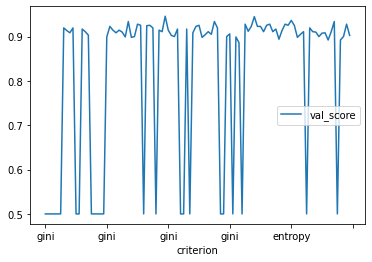

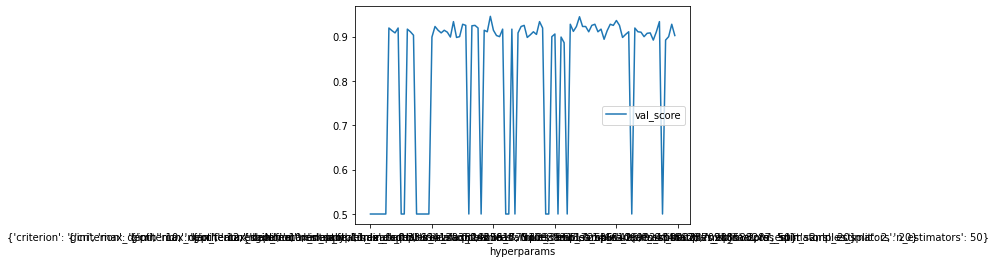

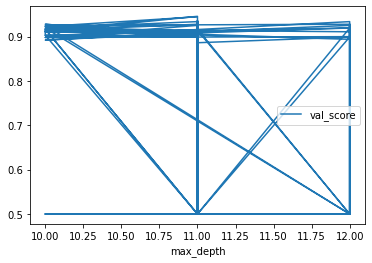

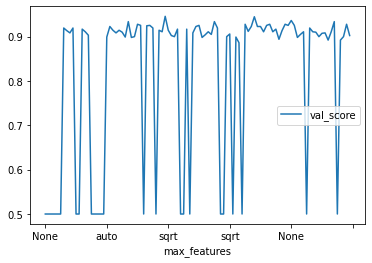

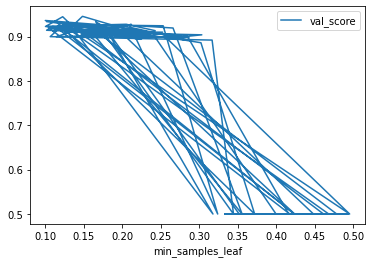

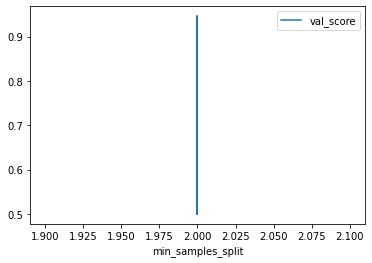

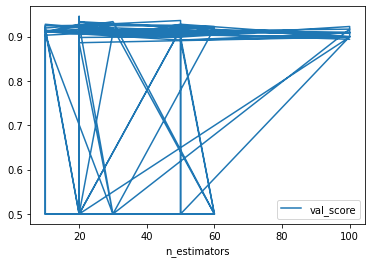

In [20]:
for col in Hyperopt.log.columns.difference(['timestamp', 'time', 'train_score', 'val_score', 'hyperparam_dict']):
    Hyperopt.log.plot(x=col,y='val_score')
    plt.show()
             

col criterion
timestamp             object
time                 float64
train_score          float64
val_score            float64
hyperparams           object
criterion             object
max_depth            float64
max_features          object
min_samples_leaf     float64
min_samples_split    float64
n_estimators         float64
dtype: object
x_type <class 'pandas.core.series.Series'>
y_type <class 'pandas.core.series.Series'>


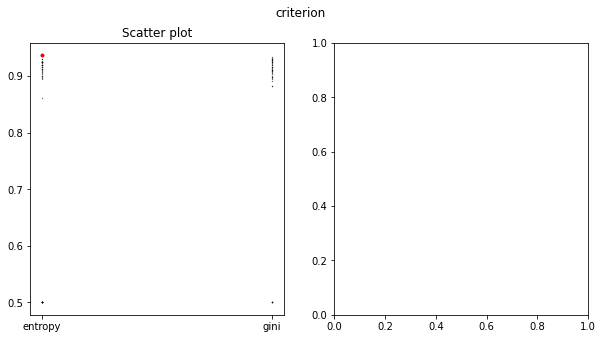

col hyperparams
timestamp             object
time                 float64
train_score          float64
val_score            float64
hyperparams           object
criterion             object
max_depth            float64
max_features          object
min_samples_leaf     float64
min_samples_split    float64
n_estimators         float64
dtype: object


TypeError: float() argument must be a string or a number, not 'dict'

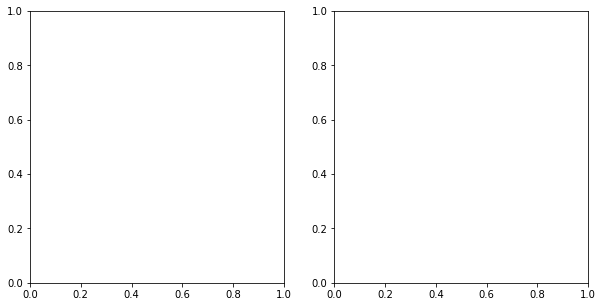

In [8]:
Hyperopt.plot()